In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#config
inputSize = 5
outputSize = 3
batchSize = 10
testSize = 5
epochs = 400
learningRate = 0.01
seed = 234

In [33]:
#functions
#Operator example in forward and backward (Mult)
def forwardMult(A,B):
    return np.matmul(A,B) 

def backwardMult(dC,A,B,dA,dB):
    dA += np.matmul(dC,np.matrix.transpose(B))
    dB += np.matmul(np.matrix.transpose(A),dC)
    
#Loss function in forward and backward - using RMSE
def forwardloss(predictedOutput,realOutput):
    if(predictedOutput.shape == realOutput.shape):
        loss = np.mean( 0.5*np.square(predictedOutput - realOutput))       
    else :
        print("Shape of arrays are not the same")
    return loss

def backwardloss(predictedOutput,realOutput):
    if(predictedOutput.shape == realOutput.shape):
        deltaOutput = (predictedOutput - realOutput)/predictedOutput.size
    else :
        print("Shape of arrays are not the same")
    return deltaOutput

#Optimizer example (SGD)
def updateweights(W,dW,learningRate):
    W -= learningRate * dW

In [34]:
#Generation of fake dataset - we generate random inputs and weights and calculate outputs
np.random.seed(seed)
inputArray = np.random.uniform(-5,5,(batchSize,inputSize))
weights = np.random.uniform(-5,5,(inputSize,outputSize))
outputArray = np.matmul(inputArray,weights)
inputTest = np.random.uniform(-5,5,(testSize,inputSize))
outputTest = np.matmul(inputTest,weights)

In [35]:
inputArray

array([[-4.69032657, -2.45717927,  4.12400444,  4.70174198, -2.53380224],
       [ 1.98807414,  3.66429319,  1.39521847, -0.43156352, -0.01205248],
       [ 2.20475007, -2.2874681 ,  3.00619031,  0.09252675,  3.19921021],
       [-1.92286763,  1.59278221, -1.86491109,  0.4465191 , -1.80158538],
       [-0.40847213,  3.13091615,  4.57551662, -4.96006497,  4.8393864 ],
       [ 4.89619708, -4.07991415, -0.3797906 ,  3.77546379, -1.2500705 ],
       [-2.61311962, -1.27454666,  0.42452043,  2.38096042,  3.77518332],
       [ 0.39582658, -4.20936429,  2.49545249,  2.00971894,  3.36574644],
       [ 1.62638802,  4.50205126,  2.23686128, -4.88461464,  1.58991466],
       [-2.84093095, -2.68033729, -3.41494537,  4.30828353, -3.67848905]])

In [36]:
outputArray

array([[-11.17950603,  25.43417531,   0.16518699],
       [ 24.87860623, -11.03967879,  14.39615915],
       [ -2.52418963,   6.70762637,   0.78973932],
       [ -1.60981036,  -3.08552581,   0.04619469],
       [ 29.15062741,  -8.68810543,  23.82789261],
       [-13.52609021,   8.3920861 , -15.93292766],
       [-31.06544943,  10.90669829,  -1.81070632],
       [-23.18183344,  16.33107095,  -6.60153049],
       [ 40.741458  , -18.02965063,  21.03103592],
       [-32.3822324 ,  12.78274158, -18.58667456]])

In [37]:
inputTest

array([[ 3.40411888,  4.01127342,  2.57050004,  0.50221462,  1.43633326],
       [-1.49326801, -3.73354615,  2.62080526, -1.24854498,  2.6817917 ],
       [-2.27883967, -0.68434092,  0.9456769 ,  1.83220263, -4.42878211],
       [ 3.23437804,  2.71494565,  1.09862213, -2.60691967,  3.97709075],
       [ 4.37686482,  1.32903548,  1.91032346,  2.83612946,  1.68293362]])

In [38]:
outputTest

array([[ 25.64540532, -11.11484824,  18.25753025],
       [-11.26106058,  13.3265913 ,  -3.79871598],
       [  5.15839871,   9.10425077,  -1.92282015],
       [ 16.91388527, -14.07686158,  12.85619453],
       [  6.501987  ,  -3.15443183,   7.64596445]])

In [39]:
#initialization of NN by other random weights
nnWeights = np.random.uniform(-3,3,(inputSize,outputSize))
deltaweights = np.zeros((inputSize,outputSize))
deltainput = np.zeros((batchSize,inputSize))
deltaoutput = np.zeros((inputSize,outputSize))

In [25]:
#Comparing the dataset weights 
weights

array([[ 2.37067693, -1.44302705, -0.15188461],
       [ 3.53546208, -2.56657374,  3.09414798],
       [ 4.01957296,  1.33025708,  2.31445914],
       [-3.61331815,  1.44262713, -0.31484193],
       [-3.56742915, -0.03572843,  0.39816026]])

In [26]:

#with the NN weights
nnWeights

array([[-0.03309891,  0.64173939,  2.42426835],
       [-0.22621591, -0.73724817, -1.85056504],
       [ 0.01589979,  2.16480131, -1.08344349],
       [ 1.1445907 , -0.88022016, -0.64781557],
       [-0.90046533,  0.11073684,  0.12841833]])

In [41]:
historyTrain=[] #Used to record the history of loss
historyTest=[]
i = 1
while i <= epochs:
    #Forwardpropagation train:
    nnOutput = forwardMult(inputArray,nnWeights)
    lossTrain = forwardloss(nnOutput,outputArray)
    historyTrain.append(lossTrain)
    
    #Forwardpropagation test:
    nnTest = forwardMult(inputTest,nnWeights)
    lossTest = forwardloss(nnTest,outputTest)
    historyTest.append(lossTest)
    #Print Loss every 50 epochs: 
    if(i%10==0):
        print("Epoch: " + str(i) + " Loss (train): " + "{0:.3f}".format(lossTrain) + " Loss (test): " + "{0:.3f}".format(lossTest))
    
    #Backpropagate
    deltaoutput = backwardloss(nnOutput,outputArray)
    backwardMult(deltaoutput,inputArray,nnWeights,deltainput,deltaweights)
    
    #Apply optimizer
    updateweights(nnWeights,deltaweights, learningRate)
    
    #Reset deltas 
    deltainput = np.zeros((batchSize,inputSize))
    deltaweights = np.zeros((inputSize,outputSize))
    deltaoutput = np.zeros((inputSize,outputSize))
    
    #Start new epoch
    i = i+1

Epoch: 10 Loss (train): 83.056 Loss (test): 33.571
Epoch: 20 Loss (train): 34.402 Loss (test): 20.068
Epoch: 30 Loss (train): 19.699 Loss (test): 16.772
Epoch: 40 Loss (train): 13.500 Loss (test): 15.158
Epoch: 50 Loss (train): 10.046 Loss (test): 13.893
Epoch: 60 Loss (train): 7.795 Loss (test): 12.790
Epoch: 70 Loss (train): 6.212 Loss (test): 11.813
Epoch: 80 Loss (train): 5.048 Loss (test): 10.940
Epoch: 90 Loss (train): 4.165 Loss (test): 10.153
Epoch: 100 Loss (train): 3.479 Loss (test): 9.438
Epoch: 110 Loss (train): 2.935 Loss (test): 8.783
Epoch: 120 Loss (train): 2.498 Loss (test): 8.184
Epoch: 130 Loss (train): 2.142 Loss (test): 7.633
Epoch: 140 Loss (train): 1.850 Loss (test): 7.126
Epoch: 150 Loss (train): 1.607 Loss (test): 6.660
Epoch: 160 Loss (train): 1.404 Loss (test): 6.230
Epoch: 170 Loss (train): 1.233 Loss (test): 5.835
Epoch: 180 Loss (train): 1.089 Loss (test): 5.470
Epoch: 190 Loss (train): 0.966 Loss (test): 5.133
Epoch: 200 Loss (train): 0.862 Loss (test): 4

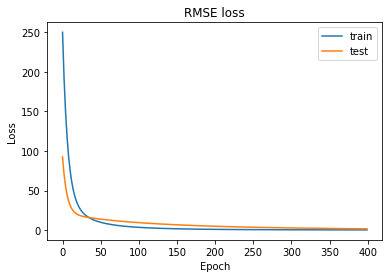

In [42]:
plt.plot(historyTrain)
plt.plot(historyTest)
plt.title('RMSE loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [43]:

# Original weights used to generate the dataset
weights

array([[ 2.37067693, -1.44302705, -0.15188461],
       [ 3.53546208, -2.56657374,  3.09414798],
       [ 4.01957296,  1.33025708,  2.31445914],
       [-3.61331815,  1.44262713, -0.31484193],
       [-3.56742915, -0.03572843,  0.39816026]])

In [44]:
# Learned weights of the NN
nnWeights

array([[ 2.43529097, -1.4471894 , -0.29675436],
       [ 3.90855824, -2.6053909 ,  2.53826137],
       [ 3.8814664 ,  1.35306056,  2.35556691],
       [-3.18163163,  1.39684641, -0.9408696 ],
       [-3.27267018, -0.0749158 ,  0.12499928]])